# Image Compression

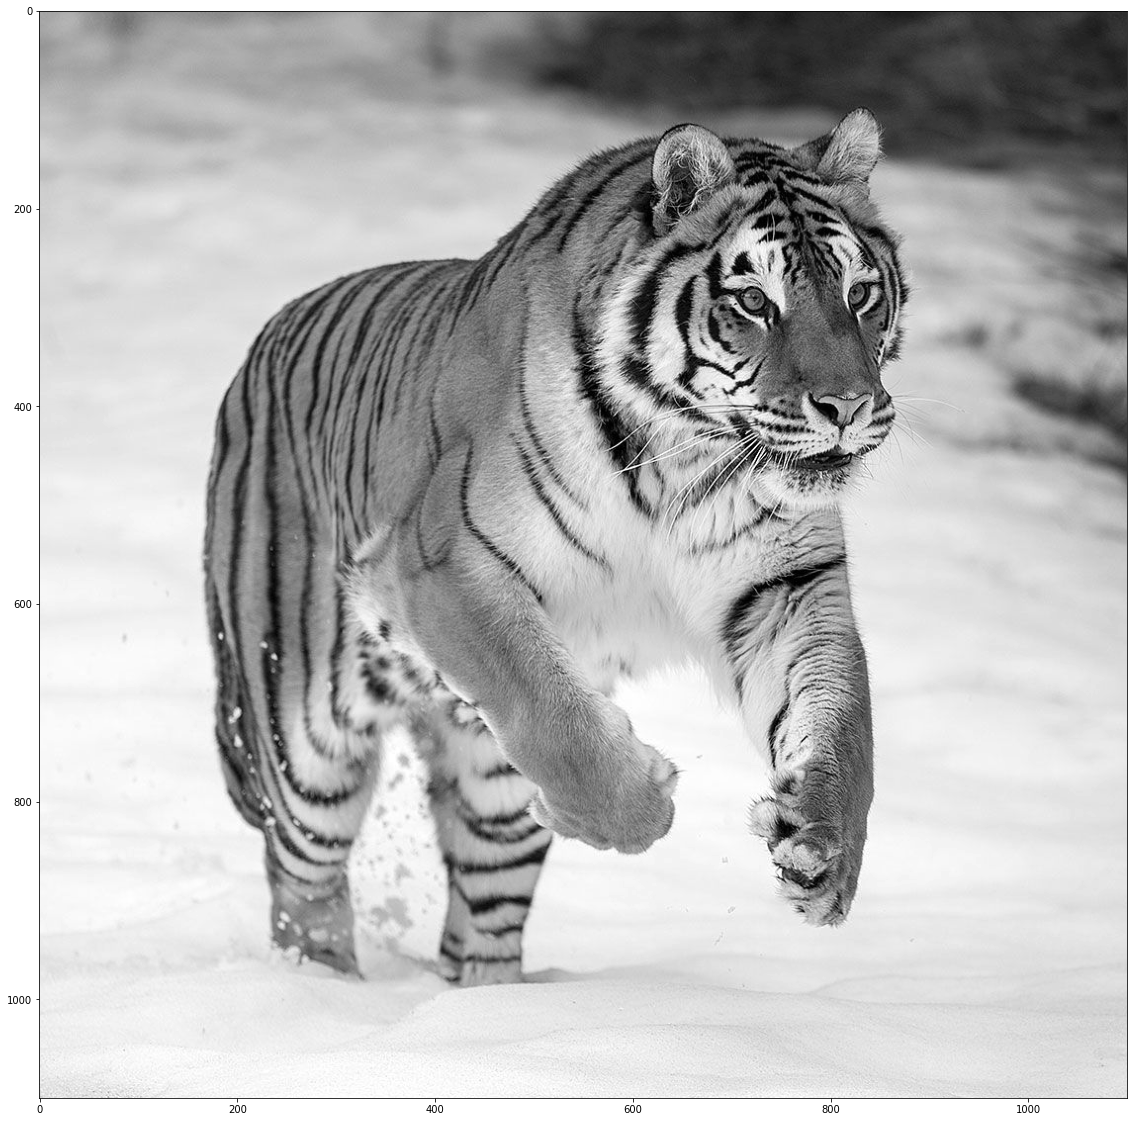

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import PIL
import urllib

url ="https://cdn.britannica.com/40/75640-050-F894DD85/tiger-Siberian.jpg" 

img = np.array(PIL.Image.open(urllib.request.urlopen(url)).convert('L'))[:1100,200:1300]
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(img, cmap = 'gray')

Run the code above, and then see what's inside 'img'.

 Remember, as we have seen in our mandelbrot set explorations, that an image is just a very big matrix. In this case, 
we have a grayscale image, with values between 0 and 255 representing the brightness of the pixel in the picture. 

We're going to attempt to compress this image. 
The first thing to try would be to take every 2nd pixel. Or every kth pixel. 

Write a function that takes as input a matrix, and 
returns a new matrix of smaller dimensions, containing only the k'th entry of every row and column (here k is another parameter).

Question: Approximately how much space do we save if k=2? k=4? k=10?

In [ ]:
# Hint: Read the following code, then run it on [[0,1,2],[6,7,8]]
def goThroughMatrix(mat):
  for i, row in enumerate(mat):
    for j, entry in enumerate(row):
      print(i,j, entry)

def naive_compress(img, k):
  new_matrix = []
  for i, row in enumerate(img):
    if i%k == 0:
      new_row = []
      for j, entry in enumerate(row):
        if j%k == 0:
          new_row.append(entry)
      new_matrix.append(new_row)
  return np.array(new_matrix)

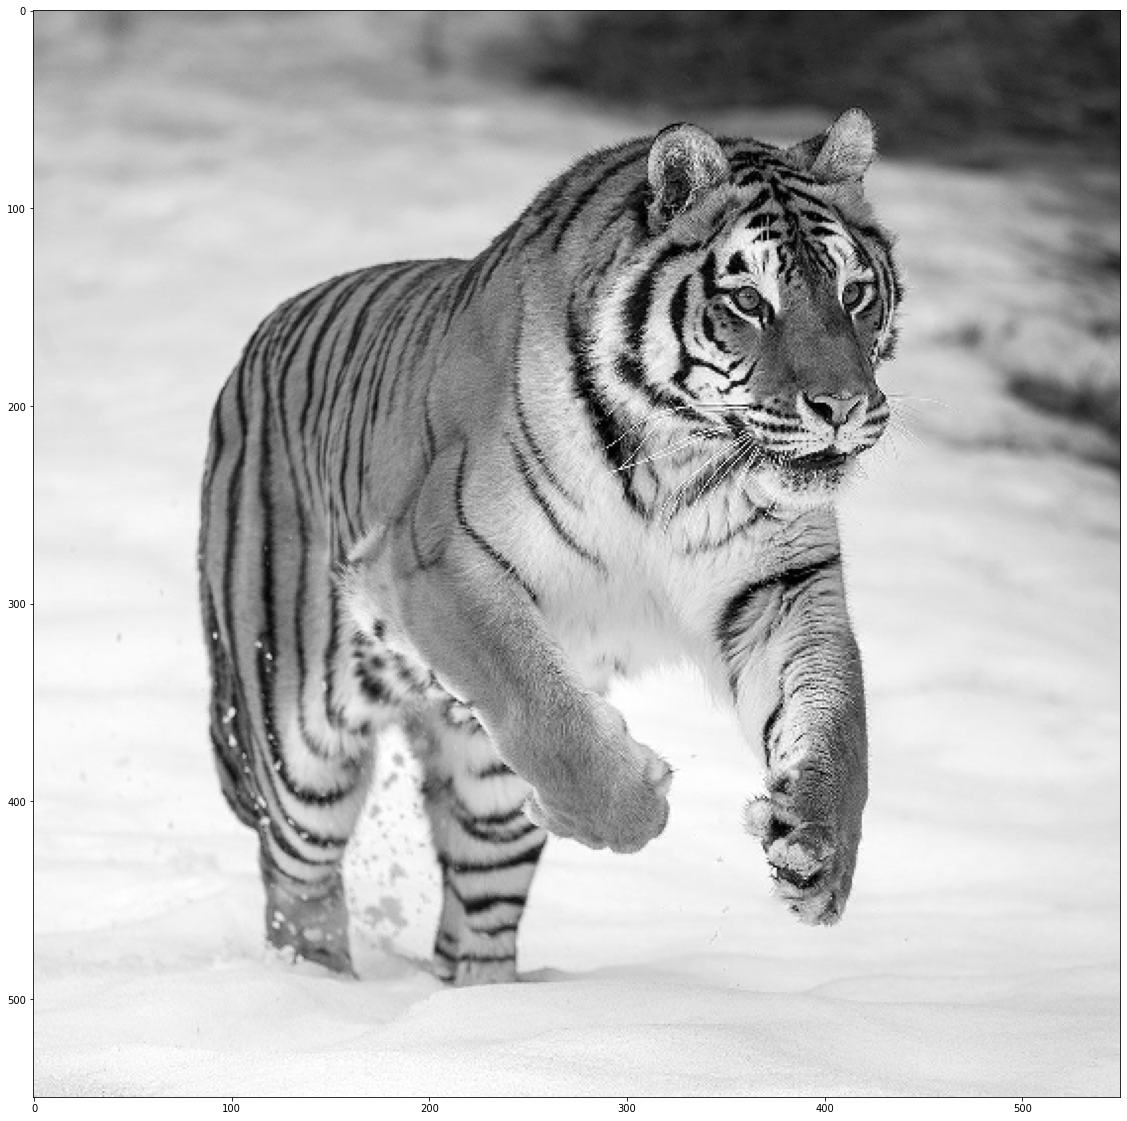

In [ ]:
sample = np.array(PIL.Image.open(urllib.request.urlopen(url)).convert('L'))[:1100,200:1300]
plt.imshow(naive_compress(sample, 2), cmap='gray')

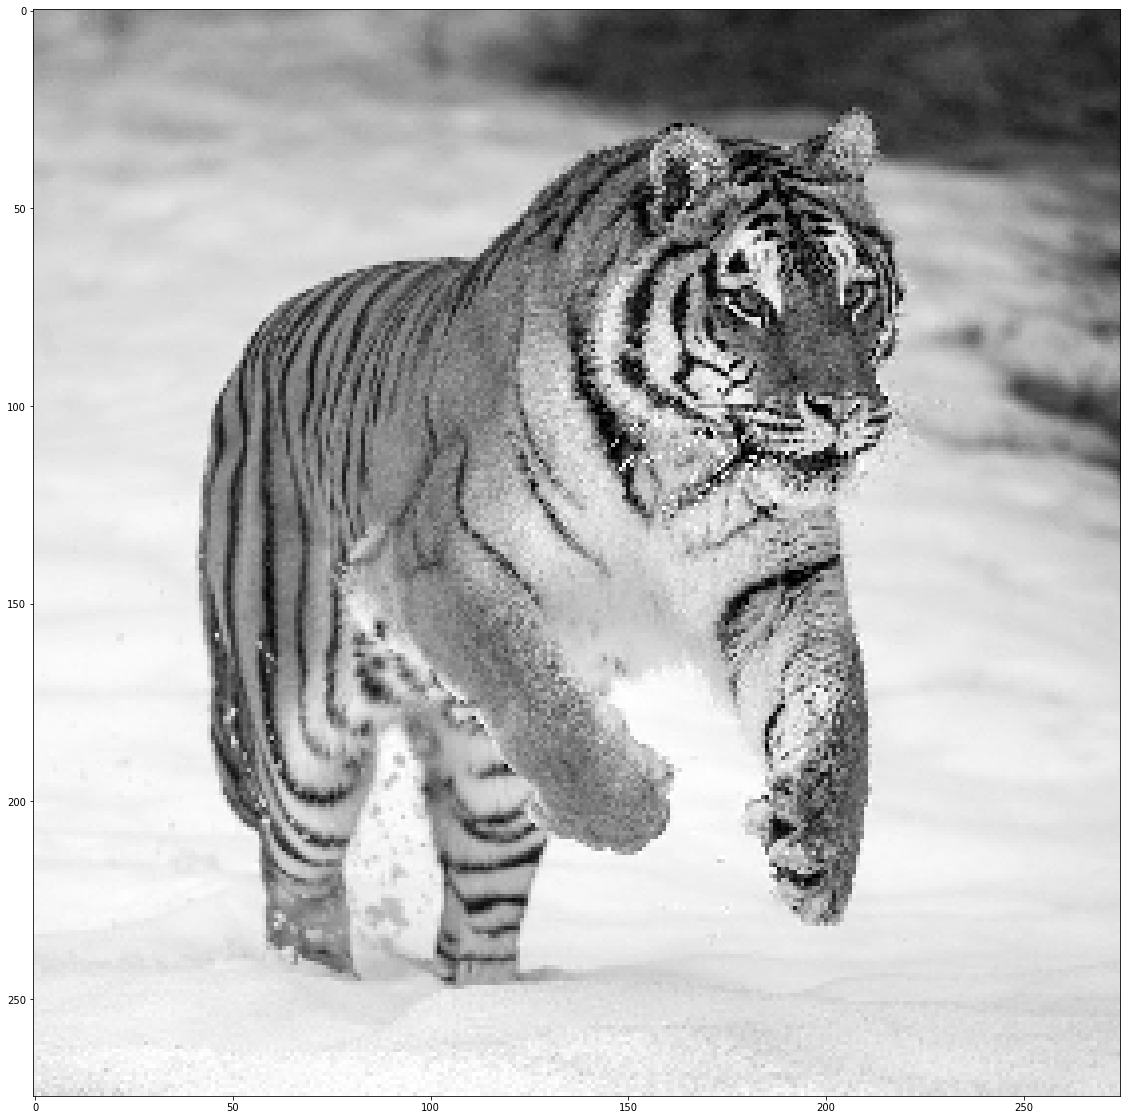

In [ ]:
plt.imshow(naive_compress(sample, 4), cmap='gray')

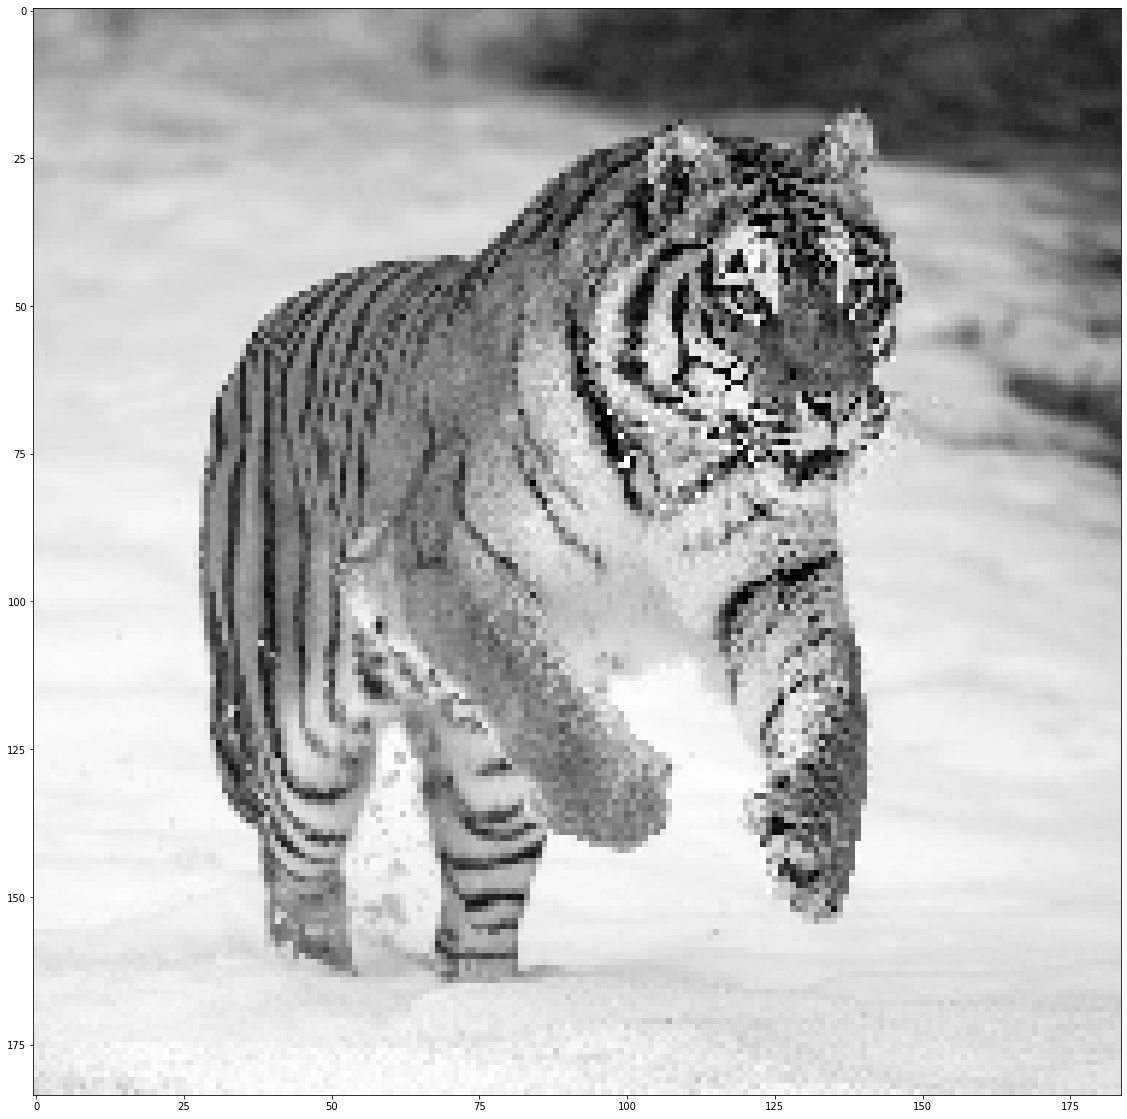

In [ ]:
plt.imshow(naive_compress(sample, 6), cmap='gray')

### Linear algebra

1. Let e1=(1,0,0), e2=(0,1,0) and e3=(0,0,1).
  Can you express v = (3,5,-6) as a combination of e1, e2, e3?

  v = 3 e1 + 5 e2 + -6 e3

Write a function that takes as input a 3dimensional np array, v, and 
returns a list of coefficients a1, a2, a3 so that v=a1e1 + a2b2+ a3b3.


a1 = (v, e1) = 3(1)+0+0 = 3 

2. Now let 
f1 = (1/sqrt(2), -1/sqrt(2), 0),  
f2 = (1/sqrt(2), 1/sqrt(2), 0), 
f3 =(0,0,1).
Can you express v in terms of a combination of f1, f2, f3? 

a1 = -1.4
a2 = 12 
a3 = -6

a1 f1 + a2 f2 + a3 f3 = v

To find ai: just do dotproduct(v, fi)/norm(fi)

norm(fi)=(sum of coefficients squared)^(1/2)

a1 = dotproduct(v, f1) = (3)(1/sqrt(2)) + (5)(-1/sqrt(2))+ (-6)(0) = -1.4



a) Write a function that takes as input, a list coefficients [a1,a2,a3],
and returns the vector a1f1+a2f2+a3b3.


b)  Write a function that takes as input a 3dimensional np array, v, and 
returns a list of coefficients a1, a2, a3 so that v=a1f1 + a2f2+ a3f3.

Check that your function works using part a)

3. The vectors (f1, f2, f3) above give a *basis* for the the space R^3. 
The vectors (e1, e2, e3) are a different basis. 

There are many other bases for R^3. Write a function that takes as input 
- a "basis" (3 vectors in R^3)
- a vector in R^3 
and returns the coefficients of the vector in that "basis". 

Write a function that does the inverse operation (reconstructs the 

4. Let n>0. Can you think of a basis for the space of n*n matrices?

5. Here's another basis for the space of n*n matrices. 
There are n^2 elements in this basis, and the basis matrices are indexed by (a,b)
as a and b range over 0...n-1.

The ab'th basis vector is the matrix

f_ab(i,j) = cos((2i+1) pi a/ (2n))cos( (2j+1) pi b/ (2n) )

Write a function that takes a nxn matrix and outputs the list of coefficents with respect to the basis f_ab

Write another function that takes a list of coefficients in that basis and returns the original matrix. 

6.  Write a function that does the following:

Input:
-- a: square matrix representing an iamge 
-- p: the proportion of coefficients to keep 

Find the coefficients for a in the basis f_ab above. Then keep the first p*N coefficients, set the others to 0. Here N is the total number of coefficients. 
Finally reconstruct the image using only the first p*N coefficients. 

Compare the output for varying p, and also compare with the naive compression scheme where we only keep every kth pixel.



Hint: you can find the dimensions of a matrix m using m.shape

In [ ]:
def matrix_basis(n):
  basis = []

  for a in range(n):
    for b in range(n):
      new_basis = np.zeros((n, n))
      new_basis[a, b] = 1
      basis.append(new_basis)
  
  return np.array(basis)

def adv_basis(n):
  #f_ab(i,j) = cos((2i+1) pi a/ (2n))cos( (2j+1) pi b/ (2n) )
  basis = []

  for a in range(n):
    for b in range(n):
      new_basis = np.zeros((n, n))
      for i in range(n):
        for j in range(n):
          new_basis[i, j] = np.cos((2*i+1)*a*np.pi)/(2*n) * np.cos((2*j+1)*b*np.pi)/(2*n)
      basis.append(new_basis)
  
  return np.array(basis)

In [ ]:
matrix_basis(3)

array([[[1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 1., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 1.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 1., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]]])

In [ ]:
adv_basis(3)

array([[[ 0.02777778,  0.02777778,  0.02777778],
        [ 0.02777778,  0.02777778,  0.02777778],
        [ 0.02777778,  0.02777778,  0.02777778]],

       [[-0.02777778, -0.02777778, -0.02777778],
        [-0.02777778, -0.02777778, -0.02777778],
        [-0.02777778, -0.02777778, -0.02777778]],

       [[ 0.02777778,  0.02777778,  0.02777778],
        [ 0.02777778,  0.02777778,  0.02777778],
        [ 0.02777778,  0.02777778,  0.02777778]],

       [[-0.02777778, -0.02777778, -0.02777778],
        [-0.02777778, -0.02777778, -0.02777778],
        [-0.02777778, -0.02777778, -0.02777778]],

       [[ 0.02777778,  0.02777778,  0.02777778],
        [ 0.02777778,  0.02777778,  0.02777778],
        [ 0.02777778,  0.02777778,  0.02777778]],

       [[-0.02777778, -0.02777778, -0.02777778],
        [-0.02777778, -0.02777778, -0.02777778],
        [-0.02777778, -0.02777778, -0.02777778]],

       [[ 0.02777778,  0.02777778,  0.02777778],
        [ 0.02777778,  0.02777778,  0.02777778],
        

In [ ]:
def coeffs(v, basis):
  '''
    input:
    v -- a 3d numpy array
    fs -- a list of vectors
    return:
    coeffList -- a list of 3 numbers a1,a2,a3,
    so that a1f1+a2f2+a3f3=v
  '''
  return [ sum(v*f)/sum(f*f)**(0.5)  for f in basis]

In [ ]:
  f1 =  np.array([1/2**0.5, 1/2**0.5, 0] )
  f2 = np.array([1/2**0.5, -1/2**0.5, 0])
  f3 = np.array([0,0, 1])
  fs = [f1,f2,f3]
  
  e1 = np.array([1,0,0])
  e2 = np.array([0,1,0])
  e3 = np.array([0,0,1])
  simpleBasis = [e1,e2,e3]

In [ ]:
coeffs(v, fs)

[5.656854249492381, -1.4142135623730951, 6.0]

In [ ]:
coeffs(v)

[5.65685424949238, -1.414213562373095, -6]

In [ ]:
5.6568*f1+ -1.414*f2+-6*f3

array([ 3.00011265,  4.99981063, -6.        ])